Justin Luo - 862013749

Moses Park - 861256602

Thomas Chin - 861290572

In [7]:
import pandas as pd
df = pd.read_csv("top1000.csv",  sep=',' , encoding='latin-1')
df

,ID,IMDB_rating,Title,Rated,Runtime,Genre,Votes,Gross,Metascore
0,tt0111161,9.3,The Shawshank Redemption,R,142 min,Drama,2194115.0,$28.34M,80.0
1,tt0068646,9.2,The Godfather,R,175 min,Crime Drama,1511727.0,$134.97M,100.0
2,tt0468569,9.0,The Dark Knight,PG-13,152 min,Action Crime Drama,2176590.0,$534.86M,84.0
3,tt0071562,9.0,The Godfather: Part II,R,202 min,Crime Drama,1058941.0,$57.30M,90.0
4,tt0167260,8.9,The Lord of the Rings: The Return of the King,PG-13,201 min,Adventure Drama Fantasy,1560333.0,$377.85M,94.0
...,...,...,...,...,...,...,...,...,...
996,tt3390572,8.1,Haider,Not Rated,160 min,Crime Drama Thriller,47432.0,$0.90M,74.0
997,tt3315342,8.1,Logan,R,137 min,Action Drama Sci-Fi,601108.0,$226.28M,77.0
998,tt3170832,8.1,Room,R,118 min,Drama Thriller,338080.0,$14.68M,86.0
999,tt3011894,8.1,Relatos salvajes,R,122 min,Comedy Drama Thriller,160501.0,$3.11M,77.0


In [8]:
df = df[:-1]

In [9]:
df['Runtime'] = df['Runtime'].str.replace('min', '').astype(int)
df.Runtime.describe()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    1000.000000
mean      135.682000
std        34.816247
min        45.000000
25%       115.000000
50%       132.000000
75%       156.000000
max       321.000000
Name: Runtime, dtype: float64

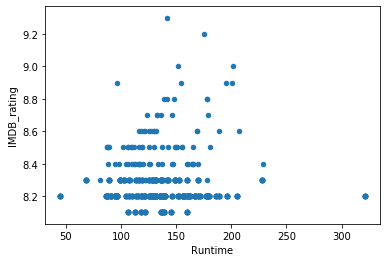

In [10]:
df.plot.scatter(y='IMDB_rating', x='Runtime')

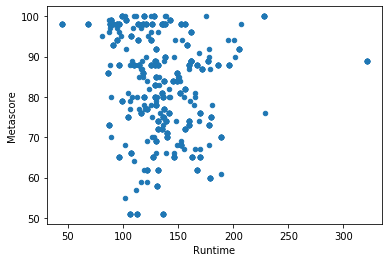

In [23]:
df.plot.scatter(y='Metascore', x='Runtime')

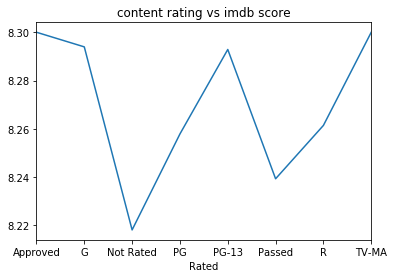

In [12]:
df.groupby("Rated")["IMDB_rating"].mean().plot(title = "content rating vs imdb score")


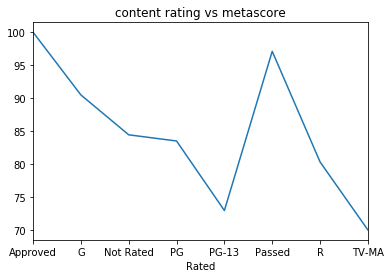

In [13]:
df.groupby("Rated")["Metascore"].mean().plot(title = "content rating vs metascore")


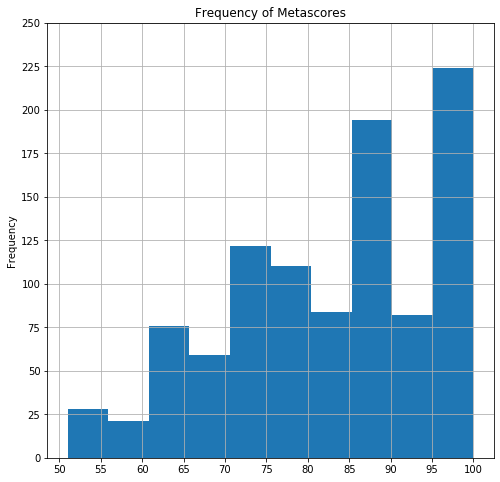

In [14]:
x = [50, 55, 60, 65, 70, 75, 80, 85, 90 ,95, 100]
y = [0, 25, 50, 75, 100 ,125, 150, 175, 200, 225, 250]
df.Metascore.plot.hist(title = "Frequency of Metascores", grid = True, xticks = x, yticks = y, figsize = (8,8))

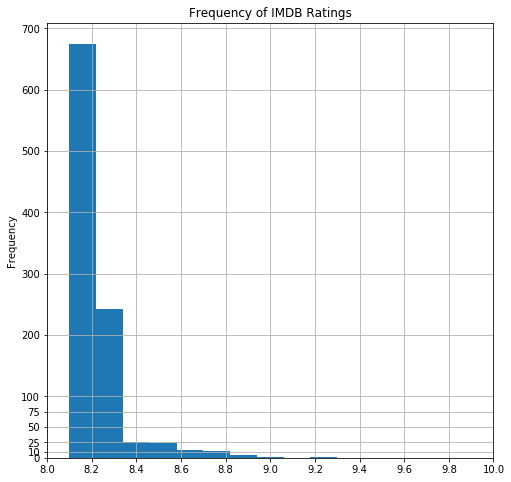

In [15]:
x = [8.0, 8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4, 9.6, 9.8, 10.0]
y = [0, 10, 25, 50 ,75, 100, 200, 300, 400, 500, 600, 700]
df.IMDB_rating.plot.hist(title = "Frequency of IMDB Ratings", grid = True, xticks = x, yticks = y, figsize = (8,8))

In [16]:
df.Gross.describe()
df['Gross'] = df['Gross'].str.replace('M', '')
df['Gross'] = df['Gross'].str.replace('$', '').astype(float)
df['Gross']

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       28.34
1      134.97
2      534.86
3       57.30
4      377.85
        ...  
995      3.49
996      0.90
997    226.28
998     14.68
999      3.11
Name: Gross, Length: 1000, dtype: float64

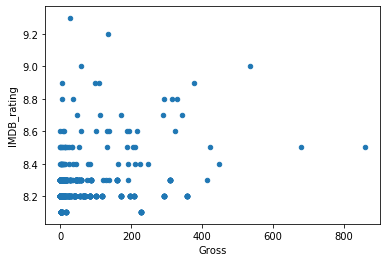

In [17]:
df.plot.scatter(y='IMDB_rating', x='Gross')

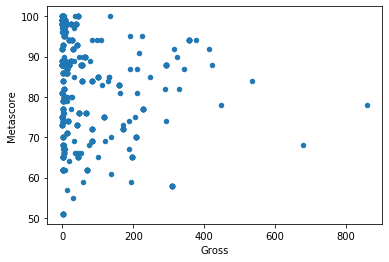

In [18]:
df.plot.scatter(y='Metascore', x='Gross')

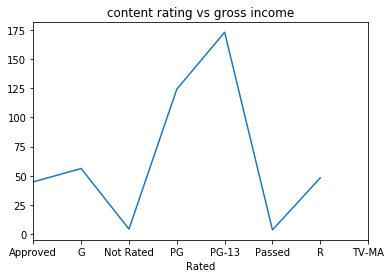

In [19]:
df.groupby("Rated")["Gross"].mean().plot(title = "content rating vs gross income")

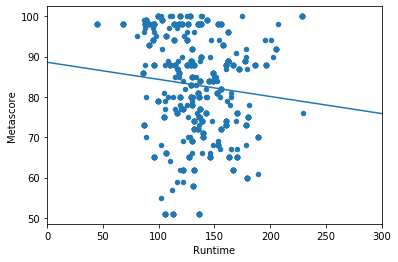

In [20]:
import numpy as np
import pandas as pd
#df = pd.read_csv("top1000.csv")
from sklearn.linear_model import LinearRegression
X_train=df[['Runtime']]
y_train=df['Metascore']
model = LinearRegression()
model.fit(X = X_train, y = y_train )
model.predict(X = X_train)

X_new = pd.DataFrame()

X_new['Runtime'] = np.linspace(0, 300, num=100)


y_new_ = pd.Series(
    model.predict(X_new), 
    index=X_new["Runtime"]    
)
df.plot.scatter(x="Runtime", y="Metascore")
y_new_.plot.line()

Metascore decreases as runtime increases

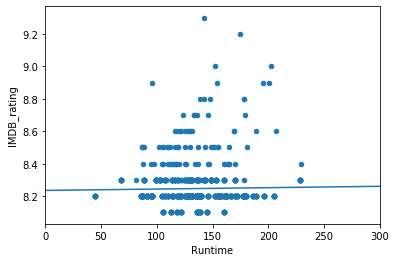

In [21]:
import numpy as np
import pandas as pd
#df = pd.read_csv("top1000.csv")
from sklearn.linear_model import LinearRegression
X_train=df[['Runtime']]
y_train=df['IMDB_rating']
model = LinearRegression()
model.fit(X = X_train, y = y_train )
model.predict(X = X_train)

X_new = pd.DataFrame()

X_new['Runtime'] = np.linspace(0, 300, num=100)


y_new_ = pd.Series(
    model.predict(X_new), 
    index=X_new["Runtime"]    
)
df.plot.scatter(x="Runtime", y="IMDB_rating")
y_new_.plot.line()

There is no noticable correlation between runtime and imdb score

One question that we asked during our project analysis was whether the amount of money spent on a movie correlated to the rating of the movie. Do multi-million dollar movies come home with the best results? We tested our hypothesis below.

In [59]:
df_temp = df
df_temp = df_temp[df_temp['Gross'].notna()]
df_temp

,ID,IMDB_rating,Title,Rated,Runtime,Genre,Votes,Gross,Metascore
0,tt0111161,9.3,The Shawshank Redemption,R,142,Drama,2194115.0,28.34,80.0
1,tt0068646,9.2,The Godfather,R,175,Crime Drama,1511727.0,134.97,100.0
2,tt0468569,9.0,The Dark Knight,PG-13,152,Action Crime Drama,2176590.0,534.86,84.0
3,tt0071562,9.0,The Godfather: Part II,R,202,Crime Drama,1058941.0,57.30,90.0
4,tt0167260,8.9,The Lord of the Rings: The Return of the King,PG-13,201,Adventure Drama Fantasy,1560333.0,377.85,94.0
...,...,...,...,...,...,...,...,...,...
995,tt3612616,8.1,Mommy,R,139,Drama,45735.0,3.49,74.0
996,tt3390572,8.1,Haider,Not Rated,160,Crime Drama Thriller,47432.0,0.90,74.0
997,tt3315342,8.1,Logan,R,137,Action Drama Sci-Fi,601108.0,226.28,77.0
998,tt3170832,8.1,Room,R,118,Drama Thriller,338080.0,14.68,86.0


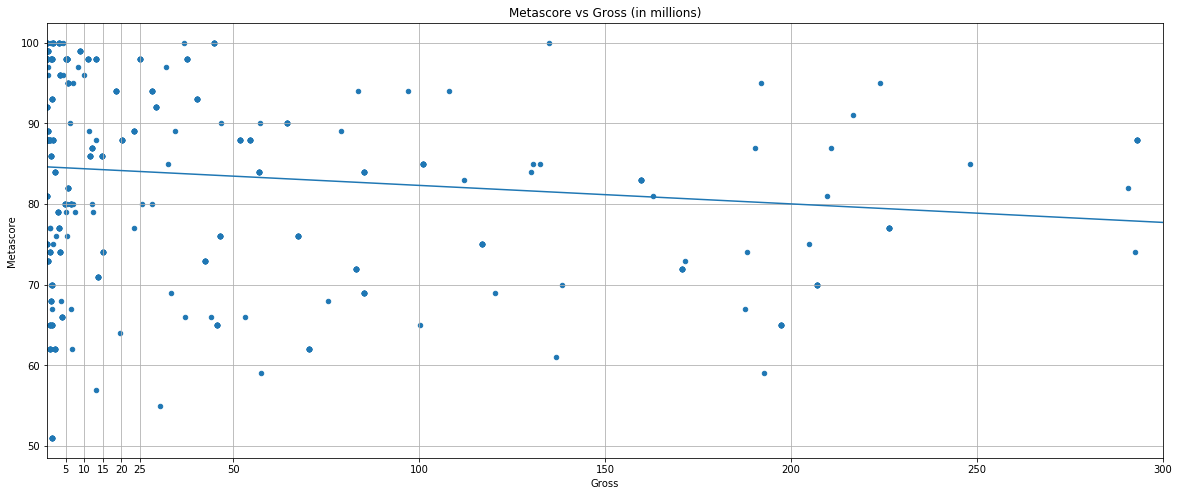

In [68]:
X_train=df_temp[['Gross']]
y_train=df_temp['Metascore']
model = LinearRegression()
model.fit(X = X_train, y = y_train )
model.predict(X = X_train)

X_new = pd.DataFrame()

X_new['Gross'] = np.linspace(0, 300, num=100)


y_new_ = pd.Series(
    model.predict(X_new), 
    index=X_new["Gross"]    
)
x = [5, 10, 15, 20, 25, 50, 100, 150, 200, 250, 300]
df_temp.plot.scatter(x="Gross", y="Metascore")
y_new_.plot.line(title = "Metascore vs Gross (in millions)", grid = True, xticks = x, figsize = (20,8))

Based on our linear regression, these is actually a slight negative correlation between ratings and income. Movies who spent a fraction of others scored higher. Therefore, the more money one spends on producing a movie does not guarentee a high score.

Another comparison that we wanted to make was between the rating of the movie (PG, PG-13, R, etc.) and the rating.

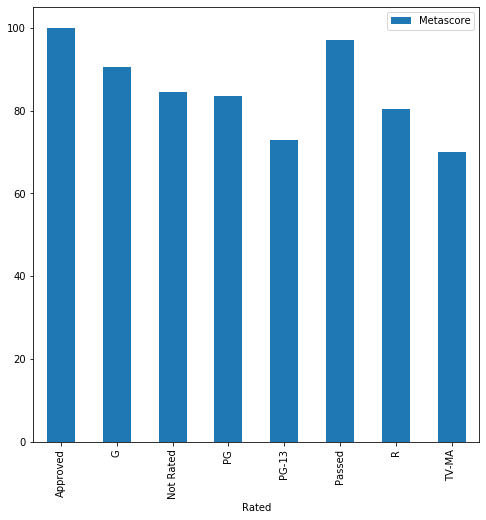

In [77]:
df[['Rated','Metascore']].groupby('Rated').mean().plot.bar(figsize = (8,8))

From our analysis, the movies that scored the highest were rated as "Approved" or "Passed". To our surprised, the rating with the lowest average score was "PG-13".

Lastly, we also made a comparison between content rating and runtime.

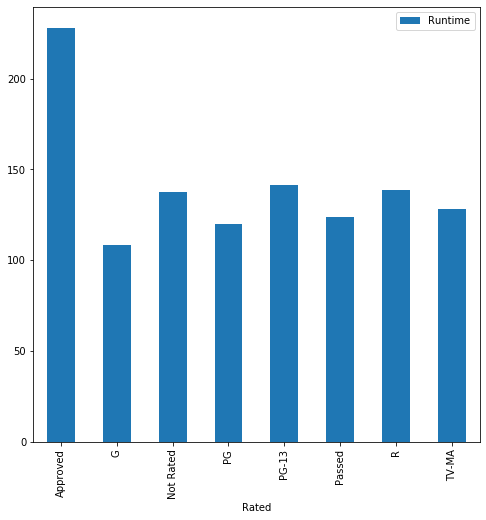

In [78]:
df[['Rated','Runtime']].groupby('Rated').mean().plot.bar(figsize = (8,8))

We noticed that "Approved" movies have significanly longer runtimes in comparison to other content ratings. Overall though, there was a similar average runtime across the board.